***FCIM.FIA - Fundamentals of Artificial Intelligence***

> **Lab 1:** *Learning* \\
> **Performed by:** *Dan, Hariton, group *FAF-211* \\
> **Verified by:** Elena Graur, asist. univ.

*Imports and Utils*

In [1]:
import cv2  
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision import models
from tqdm import tqdm
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torch.nn import functional as F
import torch.optim as  optim
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

## Task 1 
### Using OpenCV, write a function to blur an image. Adjust the parameters and explain your approach. Plot the initial image and the blurred one in the same plot using Matplotlib subplots.
### Using OpenCV, write a function to sharpen an image. Adjust the parameters and explain your approach. Plot the initial image and the sharpened one in the same plot using Matplotlib subplots.



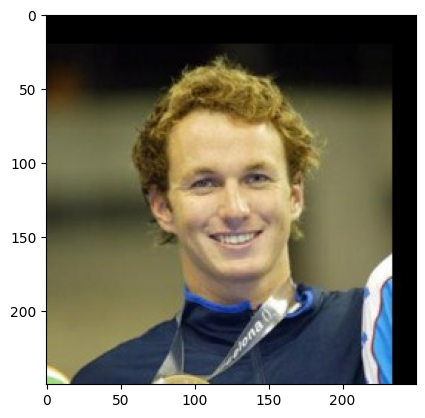

In [2]:
img = np.asarray(Image.open('D35C72.jpg'))

imgplot = plt.imshow(img)



Parameters:

src: It is the image whose is to be blurred.

ksize: A tuple representing the blurring kernel size.

dst: It is the output image of the same size and type as src.

anchor: It is a variable of type integer representing anchor point and it’s default value Point is (-1, -1) which means that the anchor is at the kernel center.

borderType: It depicts what kind of border to be added. It is defined by flags like cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, etc

Return Value: It returns an image.

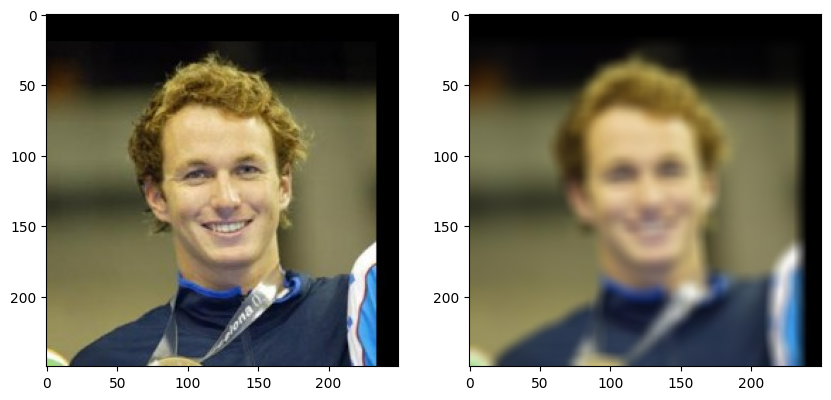

In [3]:

image = cv2.imread('D35C72.jpg')  
# read in as a BGR image, not an RGB image.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ksize = (10, 10) 

image_blur = cv2.blur(image, ksize)  

fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image_blur)


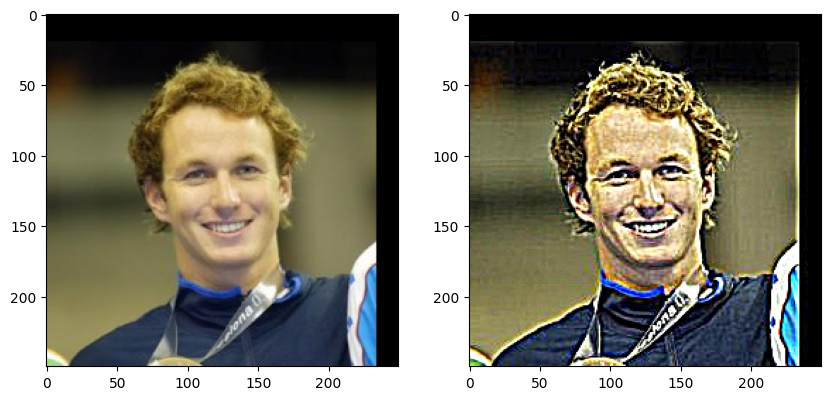

In [4]:
def unsharp_mask(image, sigma=1.0, strength=1.5, kernel_size=(5, 5)):
    # Apply Gaussian blur with specified kernel size
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    # Subtract the blurred image from the original
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

image = cv2.imread('D35C72.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sharpened_image = unsharp_mask(image, sigma=3.0, strength=5.5, kernel_size=(7, 7))


fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(sharpened_image)

## Task 2
### Implement a face detection system using OpenCV. The function should take as input one image, and output the result as the coordinates of the face in case the image contains a face. If the image does not contain any faces, return None. Assume that the image contains no more than one face.

In [42]:
image = cv2.imread('images/7E0875.jpg')
image.shape


(250, 250, 3)

To improve computational efficiency, we first need to convert this image to grayscale before performing face detection on it:

In [43]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image.shape

(250, 250)

This method was first introduced in the paper Rapid Object Detection Using a Boosted Cascade of Simple Features, written by Paul Viola and Michael Jones.

The idea behind this technique involves using a cascade of classifiers to detect different features in an image. These classifiers are then combined into one strong classifier that can accurately distinguish between samples that contain a human face from those that don’t.

Load the pre-trained Haar Cascade classifier that is built into OpenCV

In [44]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

Let’s break down the methods and parameters specified in the above code:

detectMultiScale():
The detectMultiScale() method is used to identify faces of different sizes in the input image.

grey_image:
The first parameter in this method is called grey_image, which is the grayscale image we created previously.

scaleFactor:
This parameter is used to scale down the size of the input image to make it easier for the algorithm to detect larger faces. In this case, we have specified a scale factor of 1.1, indicating that we want to reduce the image size by 10%.

minNeighbors:
The cascade classifier applies a sliding window through the image to detect faces in it. You can think of these windows as rectangles. 

Initially, the classifier will capture a large number of false positives. These are eliminated using the minNeighbors parameter, which specifies the number of neighboring rectangles that need to be identified for an object to be considered a valid detection.

To summarize, passing a small value like 0 or 1 to this parameter would result in a high number of false positives, whereas a large number could lead to losing out on many true positives.

The trick here is to find a tradeoff that allows us to eliminate false positives while also accurately identifying true positives.

minSize:
Finally, the minSize parameter sets the minimum size of the object to be detected. The model will ignore faces that are smaller than the minimum size specified.

In [45]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [46]:
def findFace(path):
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_classifier = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    )
    face = face_classifier.detectMultiScale(
        gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )
    for (x, y, w, h) in face:
        return x, y, w, h
    if len(face) == 0:
        return None
    


In [47]:
# findFace('flower.png')
# findFace('D35C72.jpg')
# findFace('image.png')



The face variable is an array with four values: the x and y axis in which the faces were detected, and their width and height. The above code iterates over the identified faces and creates a bounding box that spans across these measurements.

The parameter 0,255,0 represents the color of the bounding box, which is green, and 4 indicates its thickness.

In [48]:
for (x, y, w, h) in face:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

In [49]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

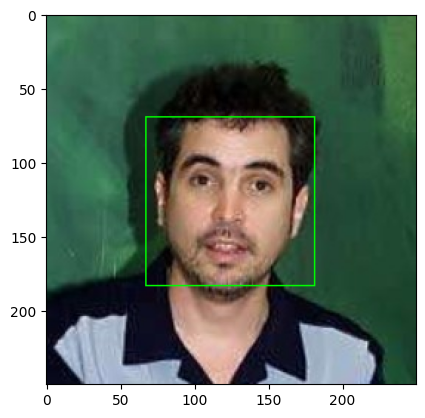

In [50]:
plt.imshow(image_rgb)

In [14]:
# def findFace(path):
#     image = cv2.imread(path)
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     face_classifier = cv2.CascadeClassifier(
#         cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
#     )
#     eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#     face = face_classifier.detectMultiScale(
#         gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
#     )
#     face_roi = gray_image[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(face_roi)

#     for (x, y, w, h) in face:
#         return x, y, w, h
#     if len(face) == 0:
#         return None
    

## Task 3
### Implement a system that detects whether a photo is accepted for a passport or not, by using OpenCV. You can be creative in determining the optimal strategy, but the system should follow the provided requirements:
- the photo should be colour;
Hint: you can check that by comparing RGB values of all the pixels; if the image is a
greyscale image then (R=G=B) for each pixel
- the photo should be in portrait orientation or square (assume that the image given as
input is not rotated);
Hint: you can use image height and width ratio
- the eyes of the subject should be at the same level (with a max. error of 5 pixels);
- the photo should contain only one person;
- the head should represent 20% to 50% of the area of the photo;
- there are no requirements regarding the background of the photo.

In [15]:
image = cv2.imread('D35C72.jpg')
image.shape
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image.shape
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [16]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [17]:
face_roi = gray_image[y:y+h, x:x+w]


In [18]:
eyes = eye_cascade.detectMultiScale(face_roi)

In [19]:
#Rectangle around eyes
for (ex, ey, ew, eh) in eyes:
     cv2.rectangle(image_rgb, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 1)

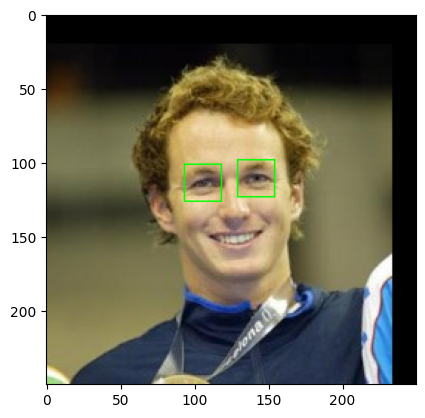

In [20]:
plt.imshow(image_rgb)

In [21]:
for (ex, ey, ew, eh) in eyes:
    print(ex, ey, ew, eh) 

58 28 25 25
22 31 25 25


In [22]:
first_eye = eyes[0]
second_eye = eyes[1]



if abs(first_eye[1] - second_eye[1]) >= 5:
    print("Not Accepted")


In [23]:

def isgray(img):
    if len(img.shape) < 3: return True
    if img.shape[2]  == 1: return True
    b,g,r = img[:,:,0], img[:,:,1], img[:,:,2]
    if (b==g).all() and (b==r).all(): return True
    return False

# isgray('flower.png')

In [24]:
img = Image.open('imagetest.jpg')

width = img.width 
height = img.height 
  
if width <= height: 
    print('Image accepted')


Image accepted


In [25]:
face = findFace('imagetest.jpg')
face_area = face[2] * face[3]
print(face[2], face[3], face_area)

454 454 206116


In [26]:
area = width * height
area

614400

So we already have the fun that find the face. As we need to see that the head proportion to the image in between 20% and 50% we will asume that the face is 75% of the frontal head space. Assuming that based on direct proportionality we need to adapt the initial valus with 30% to adapt the image rectangle for the head rectangle therefore the head would occupy between 17.5% and 57.5% using our find face fun

In [27]:
def percentage(part, whole):
  Percentage = 100 * float(part)/float(whole)
  print(Percentage, part, whole)
  if Percentage > 50 or Percentage < 20:
    return False
  return True

percentage(face_area, area)
# plt.imshow(img)

33.547526041666664 206116 614400


True

In [28]:
def passportPhoto(path):
    image = cv2.imread(path)
    if isgray(image):
        return "Not Accepted - Image is grayscale"
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_classifier = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    )
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    face = face_classifier.detectMultiScale(
        gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )
    face_roi = gray_image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(face_roi)
    if len(eyes) != 2:
        return "Not Accepted - Number of eyes detected is not 2"
    first_eye = eyes[0]
    second_eye = eyes[1]
    if abs(first_eye[1] - second_eye[1]) >= 5:
        return "Not Accepted - Eyes are not at the same level"
    with Image.open(path) as img:
        width = img.width 
        height = img.height
    if width > height:
        return "Not Accepted - Image is not in portrait or square"
    face = findFace(path)
    if face is None:
        return "Not Accepted - Face not present in the image"
    face_area = face[2] * face[3]
    area = width * height
    if percentage(face_area, area) == False:
        return "Not Accepted - Face area is not between 20% and 50% of the image area"
    return "Accepted"

passportPhoto('images/A02514.jpg')  

'Not Accepted - Eyes are not at the same level'

## Task 4 
### Download the provided image dataset and unzip it in the same folder as this notebook. You can use the images folder as data and the labels.csv file for the labels. Split your data into 3 parts the train, the validation and test sets.
- Note: while it is not a strict rule, you are encouraged to use the split of 65% for the train, 20%
for the validation, and 15% for the test; you can adjust it later for better performance

In [29]:
labels = pd.read_csv('labels.csv')
labels['result'] = labels['new_path'].apply(passportPhoto)
labels.to_csv('result.csv', index=False)

23.04 14400 62500
21.16 13225 62500
20.7936 12996 62500
21.16 13225 62500
20.4304 12769 62500
11.56 7225 62500
19.7136 12321 62500
21.16 13225 62500
21.5296 13456 62500
20.4304 12769 62500
21.16 13225 62500
19.0096 11881 62500


In [30]:
labels["label"].value_counts()

label
False    32
True     16
Name: count, dtype: int64

In [31]:
result = pd.read_csv('result.csv')
result[["label","result"]].value_counts()

label  result                                                               
False  Not Accepted - Eyes are not at the same level                            17
       Not Accepted - Number of eyes detected is not 2                          12
True   Accepted                                                                  7
       Not Accepted - Eyes are not at the same level                             5
       Not Accepted - Face area is not between 20% and 50% of the image area     2
False  Accepted                                                                  2
True   Not Accepted - Number of eyes detected is not 2                           2
False  Not Accepted - Face area is not between 20% and 50% of the image area     1
Name: count, dtype: int64

- True positive: Bad images identified as Not Accepted
- True negative: Good images identified as Accepted
- False positive: Good images identified as Not Accepted
- False negative: Bad images identified as Accepted

Based on these result we can separate them in True Positives = 30, True Negatives = 7, False Positive = 9, False Negative = 2, therefore the accuracy of our model will be 37/48 = 0.77. Our system accuracy is close to 77%

In [32]:
df = pd.read_csv('labels.csv')

In [33]:
df.head()

,new_path,label
0,images/8ECC1F.jpg,False
1,images/EF334A.jpg,False
2,images/33C8EE.jpg,True
3,images/55D113.jpg,False
4,images/386FB0.jpg,False


In [34]:
train_paths, test_paths, train_labels, test_labels = train_test_split(df["new_path"].tolist(), df["label"].tolist(), test_size=0.2)
train_paths, val_paths, train_labels, val_labels = train_test_split(train_paths, train_labels, test_size=0.25)

In [35]:
len(train_paths), len(val_paths), len(test_paths)

(28, 10, 10)

## Task 5 
### Using Tensorflow or PyTorch, develop a CNN model that will learn how to classify the images as accepted or not for passport photos (binary classifier). Train your model on the train set. It is encouraged to use the validation set for hyperparameter optimization.
- Hint: look and research what activation functions are used for binary classification (for the last
layer)

In [36]:
class PassportDataset(torch.utils.data.Dataset):
    def __init__(self, paths, labels, transform=None):
        self.paths = paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        image = Image.open(self.paths[idx])
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = PassportDataset(train_paths, train_labels, transform)
val_dataset = PassportDataset(val_paths, val_labels, transform)
test_dataset = PassportDataset(test_paths, test_labels, transform)
# Shuffling is enabled for training to ensure the model doesn’t 
# see the data in the same order for each epoch, which improves generalization.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

class_names = ["Accepted", "Not Accepted"]


Model PassportPhotoClassifier for classifying passport photos into two categories: Accepted and Not Accepted. 

Convolutional Layers (conv_layers):
- Extract spatial features from the input image.
- Reduce the spatial dimensions progressively through pooling.

Fully Connected Layers (fc_layers):
- Flatten the extracted features.
- Perform classification using linear layers and activations.

First Convolutional Block:
- Input channels: 3 (for RGB images).
- Output channels: 32 (number of filters to learn).
- Kernel size: 3×3
- Stride: 1 (filter moves by 1 pixel at a time).
- Padding: 1 (keeps the output dimensions the same as the input).
- nn.ReLU(): Applies the ReLU activation function, introducing non-linearity.
- nn.MaxPool2d(kernel_size=2, stride=2): Reduces the spatial dimensions by a factor of 2 (downsampling).

Second Convolutional Block:
- nn.Conv2d(32, 64, ...):
- Input channels: 32 (from the previous layer's output).
- Output channels: 64 (learn more complex features).
- Same ReLU and MaxPooling as above.

Third Convolutional Block:
- nn.Conv2d(64, 128, ...):
- Input channels: 64.
- Output channels: 128 (extract even higher-level features).
- Same ReLU and MaxPooling as above.
- Each convolutional block extracts features and reduces the spatial resolution:

Input image size: 224×224.
After first pooling: 112×112.
After second pooling: 56×56.
After third pooling: 28×28.
The final output from the convolutional layers has the shape: 
[batch_size,128,28,28].

In [37]:

class PassportPhotoClassifier(nn.Module):
    def __init__(self):
        super(PassportPhotoClassifier, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.5), # Drops 50% of the neurons during training to prevent overfitting.
            nn.Linear(512, 1), # Accepeted or Not Accepted
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x



In [38]:
model = PassportPhotoClassifier()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

PassportPhotoClassifier(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=512, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [39]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device, dtype=torch.float32)
            labels = labels.unsqueeze(1)  # Ensure labels are of shape (batch_size, 1)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device, dtype=torch.float32)
                labels = labels.unsqueeze(1)

                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss:.4f}")

In [40]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

Epoch 1/10: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Epoch [1/10], Train Loss: 0.6962
Epoch [1/10], Val Loss: 1.5452


Epoch 2/10: 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


Epoch [2/10], Train Loss: 1.9661
Epoch [2/10], Val Loss: 1.7039


Epoch 3/10: 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Epoch [3/10], Train Loss: 1.4333
Epoch [3/10], Val Loss: 0.8215


Epoch 4/10: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Epoch [4/10], Train Loss: 0.6556
Epoch [4/10], Val Loss: 0.6185


Epoch 5/10: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Epoch [5/10], Train Loss: 0.6282
Epoch [5/10], Val Loss: 0.6387


Epoch 6/10: 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


Epoch [6/10], Train Loss: 0.6349
Epoch [6/10], Val Loss: 0.6310


Epoch 7/10: 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


Epoch [7/10], Train Loss: 0.5279
Epoch [7/10], Val Loss: 0.6458


Epoch 8/10: 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


Epoch [8/10], Train Loss: 0.4979
Epoch [8/10], Val Loss: 0.6654


Epoch 9/10: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Epoch [9/10], Train Loss: 0.4682
Epoch [9/10], Val Loss: 0.7013


Epoch 10/10: 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


Epoch [10/10], Train Loss: 0.3979
Epoch [10/10], Val Loss: 0.7638


In [41]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device, dtype=torch.float32)
            labels = labels.unsqueeze(1)

            outputs = model(images)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(correct, total)

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

evaluate_model(model, test_loader)

6 10
Test Accuracy: 0.6000


## Task 6
### Test how well your OpenCV and CNN systems perform on a test dataset. You are required to apply your systems to all the images in the test set, and then compute the accuracy for both solutions. Calculate the accuracy of your system on the test dataset by using the formula:
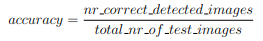

## Task 7 
### Elaborate on conclusions. Make sure to cover the following questions:
- Which approach performs better on this task and why?
- Is it useful to use a CNN for this task? Why?
- How can you improve the results obtained with the CNN?
- What can you say about the dataset?
- Do you think such systems would work in a real-life scenario?
- What approaches can be used to obtain more data?

- In my case the system I created first performs better than CNN do to the class imbalance in our data set, we have more false than true examples.
- It is usefull to use a CNN if you have a large data pool since its doesn normalise and simplify the processing of a lot of data, for smaller data sets I would recommend it since its a bit tricky to understand
- The result of CNN can be improved by balancing our data set. By undersampling or oversampling our data set to have equal number of false and true result we could improve the accuracy of our CNN
- Such systems would work in real-life but I would say you need more in-depth analysis when it comes to official documents and you still rely on human confimation and the system is prone to errors since humans are very different.
- Generating AI pictures to create more examples of pictures could be a interesting way to obtain more data, or collecting data from state if its allowed since they have a strict way of creating the pictures for official documents